# DEMO

In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), 'scripts'))

import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from math import sqrt
from embedding import adaptive_multi_level_embedding
from attack import attacks
from detection import detection


#WPSNR funzione
def wpsnr(img1, img2):
  img1 = np.float32(img1)/255.0
  img2 = np.float32(img2)/255.0
  difference = img1-img2
  same = not np.any(difference)
  if same is True:
      return 150
  w = np.genfromtxt('csf.csv', delimiter=',')
  ew = convolve2d(difference, np.rot90(w,2), mode='valid')
  decibels = 20.0*np.log10(1.0/sqrt(np.mean(np.mean(ew**2))))
  return decibels

## Embedding

WPSNR:  61.39918666501684


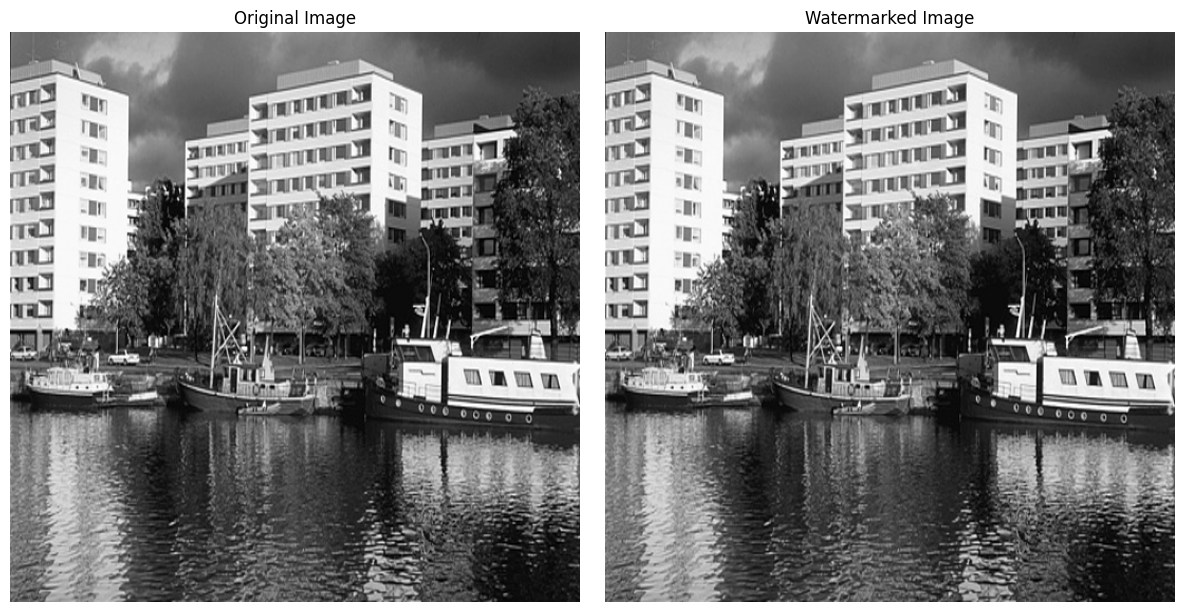

'\nwatermark = np.load(\'mediavault.npy\')\nimage_folder = \'./images\'\nwpsnr_values = []\n\nfor i in range(1, 101):\n    image_filename = f\'{i:04d}.bmp\'\n    image_path = os.path.join(image_folder, image_filename)\n    \n    if os.path.exists(image_path):\n        watermarked_image = adaptive_multi_level_embedding(image_path, watermark)\n        \n        original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)\n        \n        image_wpsnr = wpsnr(original_image, watermarked_image)\n        wpsnr_values.append(image_wpsnr)\n        \n        print(f"WPSNR for {image_filename}: {image_wpsnr:.2f} dB")\n\naverage_wpsnr = np.mean(wpsnr_values)\nprint(f"Average WPSNR: {average_wpsnr:.2f} dB") \n'

In [2]:

watermark = np.load('mediavault.npy')

image_path = './images/0099.bmp'

watermarked_image = adaptive_multi_level_embedding(image_path, watermark)

original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

image_wpsnr=wpsnr(original_image, watermarked_image)
print("WPSNR: ", image_wpsnr)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)  
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')  

plt.subplot(1, 3, 2) 
plt.imshow(watermarked_image, cmap='gray')
plt.title('Watermarked Image')
plt.axis('off')

plt.tight_layout()
plt.show() 


##decommenta sotto e commenta sopra per wpsnr su tutte le immagini con media

"""
watermark = np.load('mediavault.npy')
image_folder = './images'
wpsnr_values = []

for i in range(1, 101):
    image_filename = f'{i:04d}.bmp'
    image_path = os.path.join(image_folder, image_filename)
    
    if os.path.exists(image_path):
        watermarked_image = adaptive_multi_level_embedding(image_path, watermark)
        
        original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        image_wpsnr = wpsnr(original_image, watermarked_image)
        wpsnr_values.append(image_wpsnr)
        
        print(f"WPSNR for {image_filename}: {image_wpsnr:.2f} dB")

average_wpsnr = np.mean(wpsnr_values)
print(f"Average WPSNR: {average_wpsnr:.2f} dB") 
"""

## ROC

## Attack

In [9]:
#attacked_image = attacks(watermarked_image, 'blur', 1)
#attacked_image = attacks(watermarked_image, 'awgn', [10, 42])
#attacked_image = attacks(watermarked_image, 'sharpening', [0.5, 0.7])
#attacked_image = attacks(watermarked_image, 'median', 3)
#attacked_image = attacks(watermarked_image, 'resize', 0.75)
##attacked_image = attacks(watermarked_image, 'jpeg', 30)
#attacked_image = attacks(watermarked_image, ['resize','blur'], [0.75,1])

## Detection

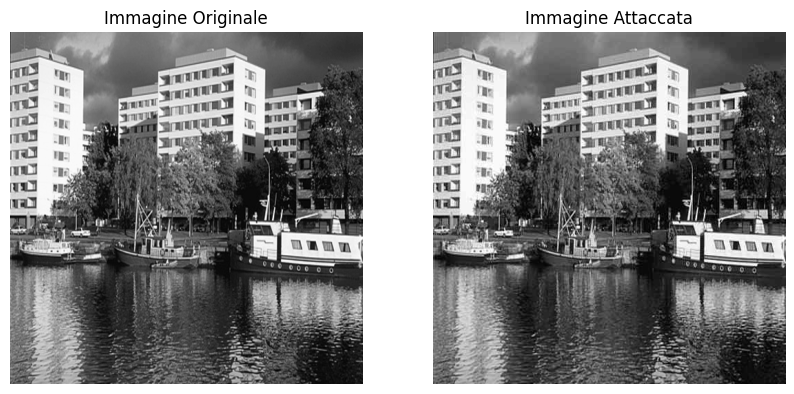

Il watermark è presente nell'immagine attaccata.
WPSNR tra l'immagine watermarked e quella attaccata: 25.143866605662826 dB


In [10]:
output1, output2 = detection(original_image, watermarked_image, attacked_image)

plt.figure(figsize=(10, 5))

# Plotta l'immagine originale
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Immagine Originale')
plt.axis('off')

# Plotta l'immagine attaccata
plt.subplot(1, 2, 2)
plt.imshow(attacked_image, cmap='gray')
plt.title('Immagine Attaccata')
plt.axis('off')

# Mostra il plot
plt.show()


# 3. Mostra i risultati della detection
if output1 == 1:
    print("Il watermark è presente nell'immagine attaccata.")
else:
    print("Il watermark è stato distrutto.")

print(f"WPSNR tra l'immagine watermarked e quella attaccata: {output2} dB")